<a href="https://colab.research.google.com/github/joordonezo-other-project/clasificadorDeArepas/blob/main/Clasificador_de_arepas_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/Trabajo De grado/arepasDatasetNuevasSinFondoMejoradas.zip' -d ./

Archive:  /content/drive/MyDrive/Trabajo De grado/arepasDatasetNuevasSinFondoMejoradas.zip
   creating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/
   creating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171433084.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171442075.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171451984.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171509307.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171517017.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171523813.png  
  inflating: ./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171530276.png  
  inflating: .

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 20.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

In [ ]:

print("Versión de TensorFlow:", tf.__version__)


Versión de TensorFlow: 2.14.0


In [ ]:
def to_grayscale_from_rgb(image):
  image = tf.convert_to_tensor(image)
  return image

(240, 320, 3)


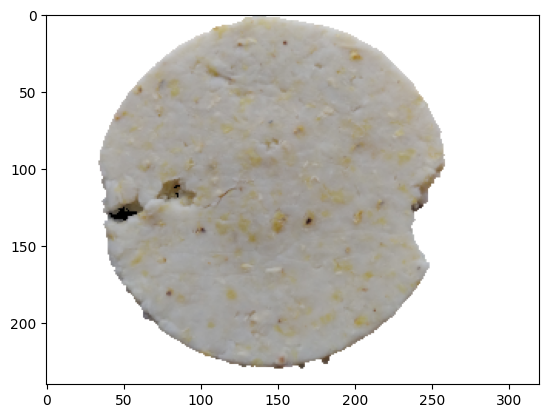

In [ ]:
#imprimir primera imagen
image = tf.io.read_file('./arepasDatasetNuevasSinFondoMejoradas/entrenamiento/defectuosas/IMG_20230820_171451984.png')
image = tf.image.decode_jpeg(image, channels=3)
gray_image = to_grayscale_from_rgb(image)
print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')
plt.show()

In [ ]:
TAM_X_ORIG=240
TAM_Y_ORIG=320
X_TAM=int(TAM_X_ORIG * 1)
Y_TAM=int(TAM_Y_ORIG * 1)
BATCH_SIZE=32
tf.random.set_seed(1)

train_data_generator  = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. /255,
    validation_split=0.1,
    width_shift_range=0.01,
    height_shift_range=0.03,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=.01,
    preprocessing_function=to_grayscale_from_rgb
)

validation_data_generator  = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. /255,
    validation_split=0.1,
)

path_data="./arepasDatasetNuevasSinFondoMejoradas"
path_entrenamiento = path_data + "/entrenamiento"
path_pruebas = path_data + "/pruebas"
data_entrenamiento = train_data_generator.flow_from_directory(path_entrenamiento,
                                                              target_size=(X_TAM, Y_TAM),
                                                              color_mode="grayscale",
                                                              batch_size=BATCH_SIZE,
                                                              shuffle=True,
                                                              class_mode='categorical',
                                                              subset="training"
                                                              )

data_validacion = validation_data_generator.flow_from_directory(path_entrenamiento,
                                                                target_size=(X_TAM, Y_TAM),
                                                                color_mode="grayscale",
                                                                batch_size=BATCH_SIZE,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                subset="validation"
                                                                )

data_test = validation_data_generator.flow_from_directory(path_pruebas,
                                                          target_size=(X_TAM, Y_TAM),
                                                          color_mode="grayscale",
                                                          batch_size=BATCH_SIZE,
                                                          shuffle=False,
                                                          class_mode='categorical',
                                                          )

Found 918 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


Shape:  (240, 320, 1)


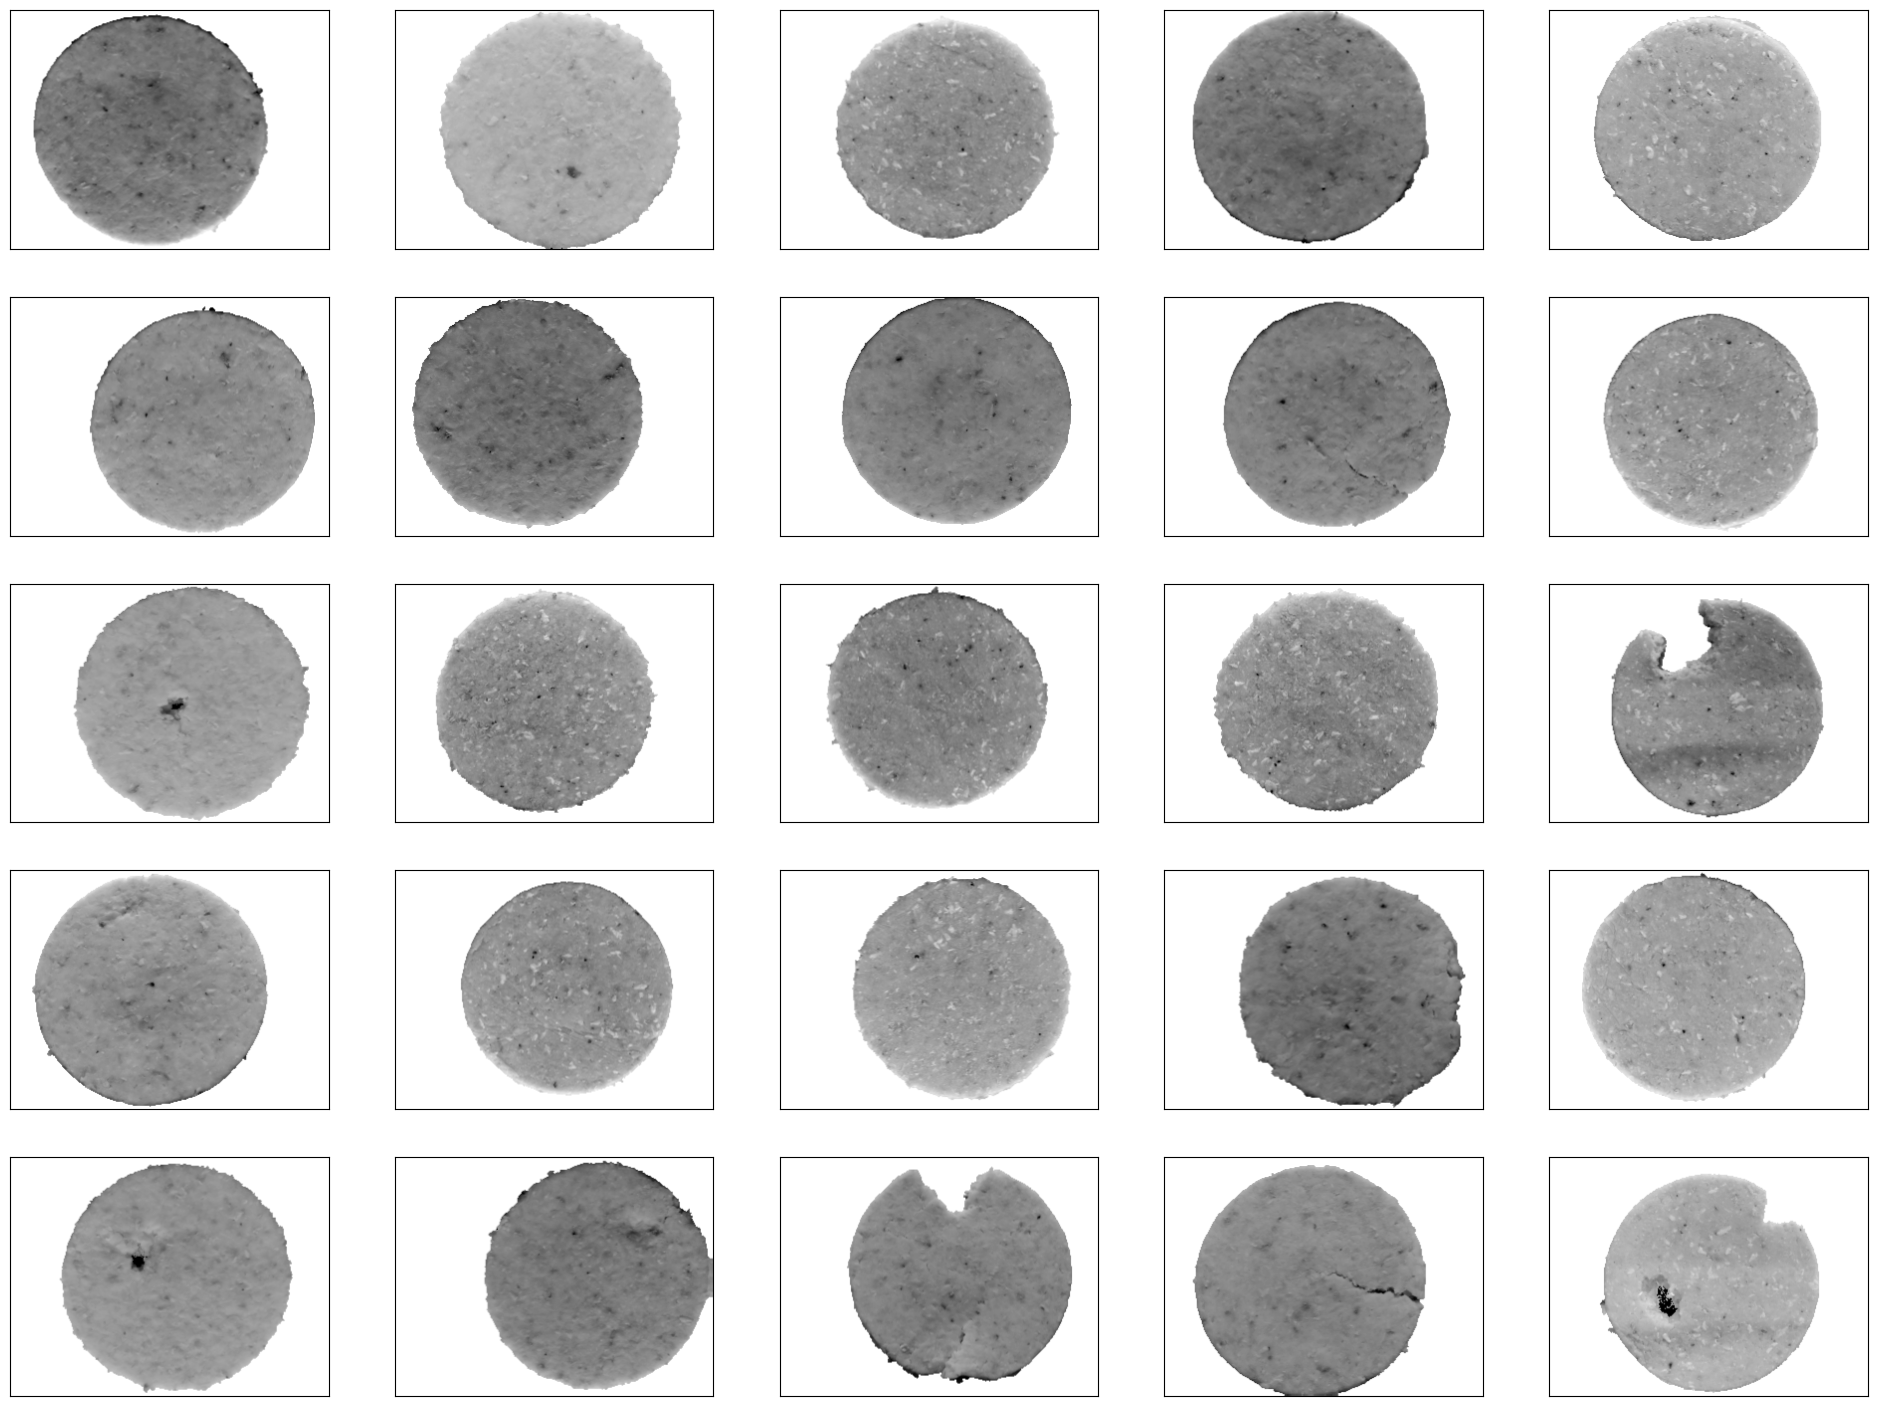

{'defectuosas': 0, 'perfectas': 1}


In [ ]:
#ver imagen de prueba en plt
plt.figure(figsize=(24, 18))
count = 0  # Contador para el número de imágenes mostradas

for imagenes, etiquetas in data_entrenamiento:
    print("Shape: ",imagenes[0].shape)
    for i in range(len(imagenes)):
        plt.subplot(5, 5, count + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagenes[i], cmap='gray')  # Mostrar la imagen en escala de grises
        count += 1
        if count >= 25:
            break
    if count >= 25:
        break

plt.show()

print(data_entrenamiento.class_indices)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(X_TAM,Y_TAM,1), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(2, activation="softmax"),
])

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
modelName = 'split0-1+3Xfilter+D250+E50+S1+test'
tensorboardCNN = keras.callbacks.TensorBoard(log_dir=('logs/'+modelName))
EPOCAS = 50
entrenamiento = modelo.fit(
    data_entrenamiento,
    batch_size=BATCH_SIZE,
    steps_per_epoch=int(np.ceil(data_entrenamiento.n / float(BATCH_SIZE))),
    epochs=EPOCAS,
    validation_data=data_validacion,
    validation_steps=int(np.ceil(data_validacion.n / float(BATCH_SIZE))),
    callbacks=[tensorboardCNN]
)
print("Guardando model .h5")
modelo.save(('./modelos/'+modelName+'/modelo.h5'))
score = modelo.evaluate(data_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# guardar modelo en tensorflowjs
print("Guardando model tfjs")
tfjs.converters.save_keras_model(modelo, ('./modelos/'+modelName))
print("Finalizó todo correctamente!!!")

Epoch 1/50
29/29 [==============================] - 172s 6s/step - loss: 1.7350 - accuracy: 0.4956 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/50
29/29 [==============================] - 157s 5s/step - loss: 0.6998 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
29/29 [==============================] - 155s 5s/step - loss: 0.6839 - accuracy: 0.6176 - val_loss: 0.7237 - val_accuracy: 0.5000
Epoch 4/50
29/29 [==============================] - 153s 5s/step - loss: 0.5035 - accuracy: 0.7734 - val_loss: 0.5542 - val_accuracy: 0.8039
Epoch 5/50
29/29 [==============================] - 165s 6s/step - loss: 0.4821 - accuracy: 0.7810 - val_loss: 0.5163 - val_accuracy: 0.8137
Epoch 6/50
29/29 [==============================] - 154s 5s/step - loss: 0.5322 - accuracy: 0.7200 - val_loss: 0.6240 - val_accuracy: 0.6373
Epoch 7/50
29/29 [==============================] - 155s 5s/step - loss: 0.4914 - accuracy: 0.7756 - val_loss: 0.5332 - val_accuracy: 0.7549
Epoch 8/50
29

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 10s 1s/step - loss: 30.4484 - accuracy: 0.4510
Test loss: 30.448427200317383
Test accuracy: 0.45098039507865906
Guardando model tfjs
Finalizó todo correctamente!!!


In [ ]:
%load_ext tensorboard

In [ ]:
!kill 6331
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>